In [ ]:
# # IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# # RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
# import kagglehub
# kagglehub.login()
## ipynb-py-convert examples/plot.py examples/plot.ipynb



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

from tqdm import tqdm

balanced_df = pd.read_csv('subset.csv')
balanced_df.info()

# Selecting relevant columns
numerical_features = ['url_length', 'url_entropy', 'digit_letter_ratio',
                     'dot_count', 'at_count', 'dash_count', 'tld_count',
                     'subdomain_count', 'nan_char_entropy', 'domain_age_days']
categorical_features = ['label']

balanced_df = balanced_df[numerical_features + categorical_features]

# Encode categorical variables
balanced_df['label_encoded'] = balanced_df['label'].map({'legitimate': 0, 'phishing': 1})

# Create feature matrix X with only numerical columns
X = balanced_df[numerical_features].copy()
y = balanced_df['label_encoded'].copy()

# Handle missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [2]:
# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# spectatorish_balanced_phishing_path = kagglehub.dataset_download('spectatorish/balanced-phishing')

# print('Data source import complete.')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

from tqdm import tqdm

# Load dataset

# df = pd.read_csv('/kaggle/input/phishing/out.csv')
# df.head()

In [ ]:
# print(df['label'].value_counts())

In [ ]:
# # Using a subset
# target_size = 50000

# legitimate_sample = df[df['label'] == 'legitimate'].sample(n=target_size, random_state=42)
# phishing_sample = df[df['label'] == 'phishing'].sample(n=target_size, random_state=42)

# # Combining the samples
# balanced_df = pd.concat([legitimate_sample, phishing_sample])

# # Shuffling
# balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# # Save the balanced_df subset to a new CSV file
# balanced_df.to_csv('subset.csv', index=False)

In [ ]:
# balanced_df =  pd.read_csv('/kaggle/input/balanced-phishing/subset.csv')

In [ ]:
# balanced_df = pd.read_csv(spectatorish_balanced_phishing_path + '/subset.csv')

In [2]:
balanced_df = pd.read_csv('subset.csv')
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   url                 100000 non-null  object 
 1   source              100000 non-null  object 
 2   label               100000 non-null  object 
 3   url_length          100000 non-null  int64  
 4   starts_with_ip      100000 non-null  bool   
 5   url_entropy         100000 non-null  float64
 6   has_punycode        100000 non-null  bool   
 7   digit_letter_ratio  100000 non-null  float64
 8   dot_count           100000 non-null  int64  
 9   at_count            100000 non-null  int64  
 10  dash_count          100000 non-null  int64  
 11  tld_count           100000 non-null  int64  
 12  domain_has_digits   100000 non-null  bool   
 13  subdomain_count     100000 non-null  int64  
 14  nan_char_entropy    100000 non-null  float64
 15  has_internal_links  100000 non-null

In [3]:
# Display the balanced dataset
print(balanced_df['label'].value_counts())
print(balanced_df.head())

label
phishing      50000
legitimate    50000
Name: count, dtype: int64
                                          url             source       label  \
0            http://ameszcn.000webhostapp.com  Phishing.Database    phishing   
1                   https://hjmtn.blogspot.is  Phishing.Database    phishing   
2                                targetoo.com     Cisco-Umbrella  legitimate   
3                          http://urkeaxb.com  Phishing.Database    phishing   
4  http://tiny-thunder-2796.on.fleek.co/?naps  Phishing.Database    phishing   

   url_length  starts_with_ip  url_entropy  has_punycode  digit_letter_ratio  \
0          32           False     3.991729         False            0.125000   
1          25           False     3.733661         False            0.000000   
2          12           False     3.022055         False            0.000000   
3          18           False     3.947703         False            0.000000   
4          42           False     4.481254     

In [4]:
# Selecting relevant columns
numerical_features = ['url_length', 'url_entropy', 'digit_letter_ratio',
                     'dot_count', 'at_count', 'dash_count', 'tld_count',
                     'subdomain_count', 'nan_char_entropy', 'domain_age_days']
categorical_features = ['label']

balanced_df = balanced_df[numerical_features + categorical_features]

In [5]:
# Encode categorical variables
balanced_df['label_encoded'] = balanced_df['label'].map({'legitimate': 0, 'phishing': 1})

# Create feature matrix X with only numerical columns
X = balanced_df[numerical_features].copy()
y = balanced_df['label_encoded'].copy()

In [18]:
# Handle missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Apply KMeans clustering with 2 clusters for legitimate and phishing
kmeans = KMeans(n_clusters=2, random_state=4, n_init=1)
kcluster_labels = kmeans.fit_predict(X_pca)

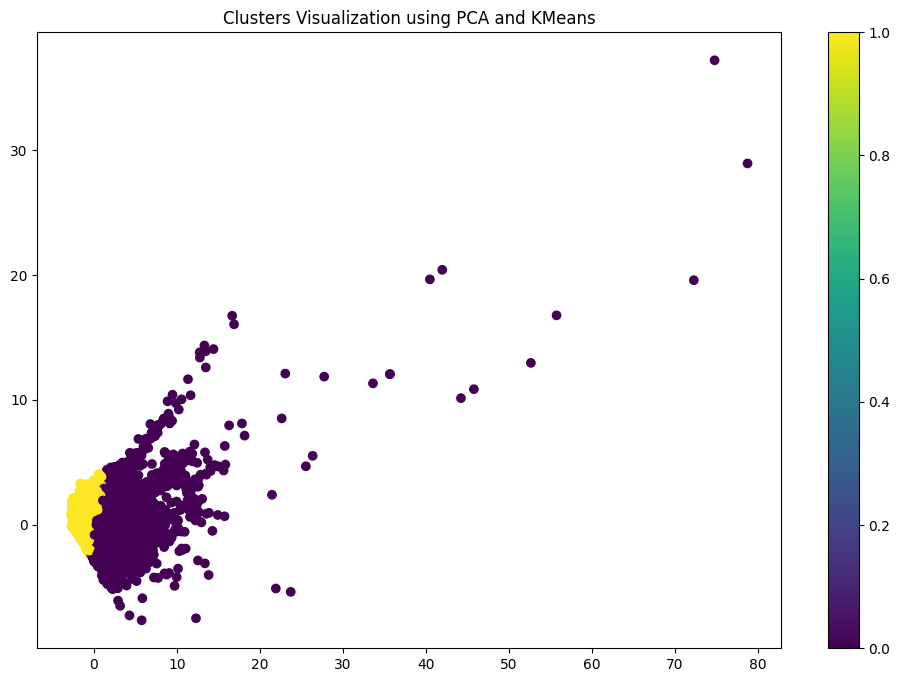

In [ ]:
# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kcluster_labels, cmap='viridis')
plt.title('Clusters Visualization using PCA and KMeans')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Count the number of values in each cluster
cluster_counts = pd.Series(kcluster_labels).value_counts()
print(cluster_counts)

1    58221
0    41779
Name: count, dtype: int64


The clusters are imbalanced by 8k values

Hence we shall try using a number of clusters and then grouping them

In [ ]:
# Create a DataFrame with the original labels and the kmeans cluster labels
kmeans_analysis = pd.DataFrame({
    'original_label': balanced_df['label'],
    'cluster_label': kcluster_labels
})

# Group by cluster label and count the occurrences of each original label
kcluster_label_counts = kmeans_analysis.groupby('cluster_label')['original_label'].value_counts().unstack(fill_value=0)

# Print the counts to see which cluster label corresponds to which original label
print(kcluster_label_counts)

original_label  legitimate  phishing
cluster_label                       
0                     4343     37436
1                    45657     12564


Cluster 0 has 4345 legitimate and 37429 phishing samples.

Cluster 1 has 45655 legitimate and 12571 phishing samples.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define confusion matrix values
TP = kcluster_label_counts.loc[0, 'phishing']
TN = kcluster_label_counts.loc[1, 'legitimate']
FP = kcluster_label_counts.loc[0, 'legitimate']
FN = kcluster_label_counts.loc[1, 'phishing']

# Create true and predicted arrays based on these values
true_labels = [1] * TP + [1] * FN + [0] * TN + [0] * FP
predicted_labels = [1] * TP + [0] * FN + [0] * TN + [1] * FP

# Calculate metrics using sklearn functions
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.83093
Precision: 0.8960482539074655
Recall: 0.74872
F1 Score: 0.8157857461946633


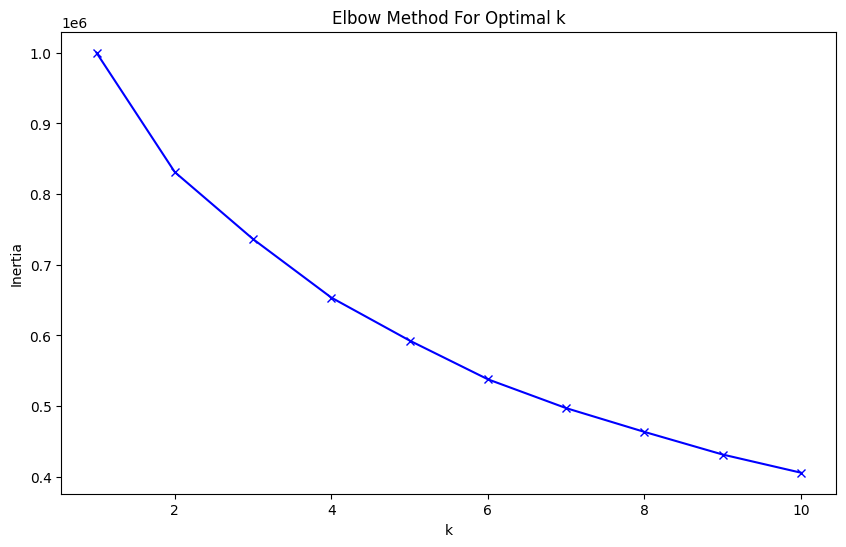

In [ ]:
# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we see 2 clusters alone give us the converged results, let's confirm by trying out different number of clusters.

In [ ]:
# Apply KMeans clustering with 10 clusters (best one found out of multiple clusters and states)
kmeans1 = KMeans(n_clusters=10, random_state=42, n_init=10)
kcluster_labels1 = kmeans1.fit_predict(X_pca)

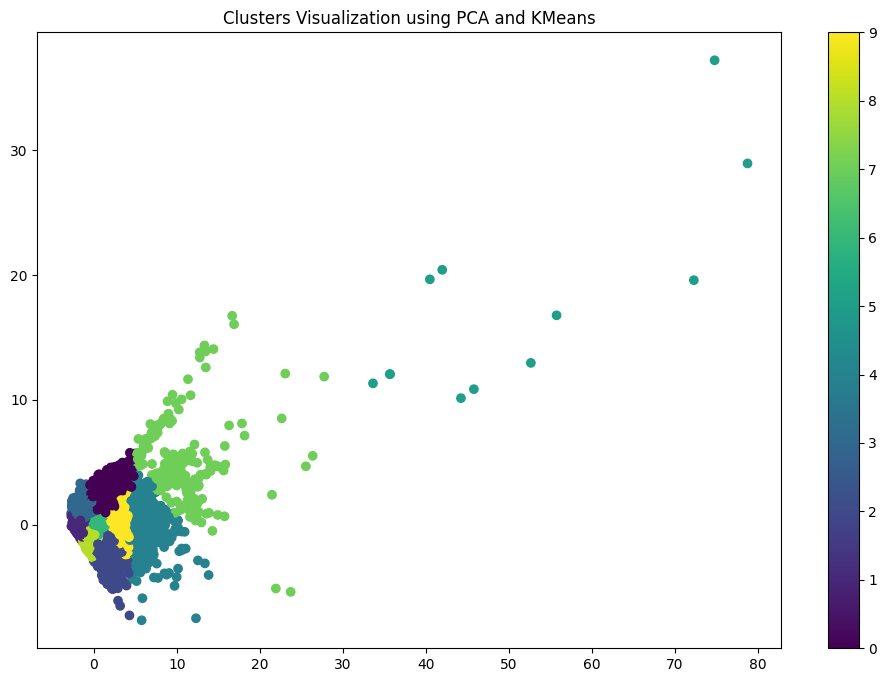

In [ ]:
# Plot clusters
plt.figure(figsize=(12, 8))
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kcluster_labels1, cmap='viridis')
plt.title('Clusters Visualization using PCA and KMeans')
plt.colorbar(scatter1)
plt.show()

In [ ]:
# Create a DataFrame with the original labels and the kmeans cluster labels
kmeans_analysis1 = pd.DataFrame({
    'original_label': balanced_df['label'],
    'cluster_label': kcluster_labels1
})

# Group by cluster label and count the occurrences of each original label
kcluster_label_counts1 = kmeans_analysis1.groupby('cluster_label')['original_label'].value_counts().unstack(fill_value=0)

# Print the counts to see which cluster label corresponds to which original label
print(kcluster_label_counts1)

original_label  legitimate  phishing
cluster_label                       
0                     5759      1458
1                    22450       128
2                      111      9213
3                    17450        66
4                        6      1177
5                        0        12
6                     2937     14333
7                       64       299
8                     1031     16906
9                      192      6408


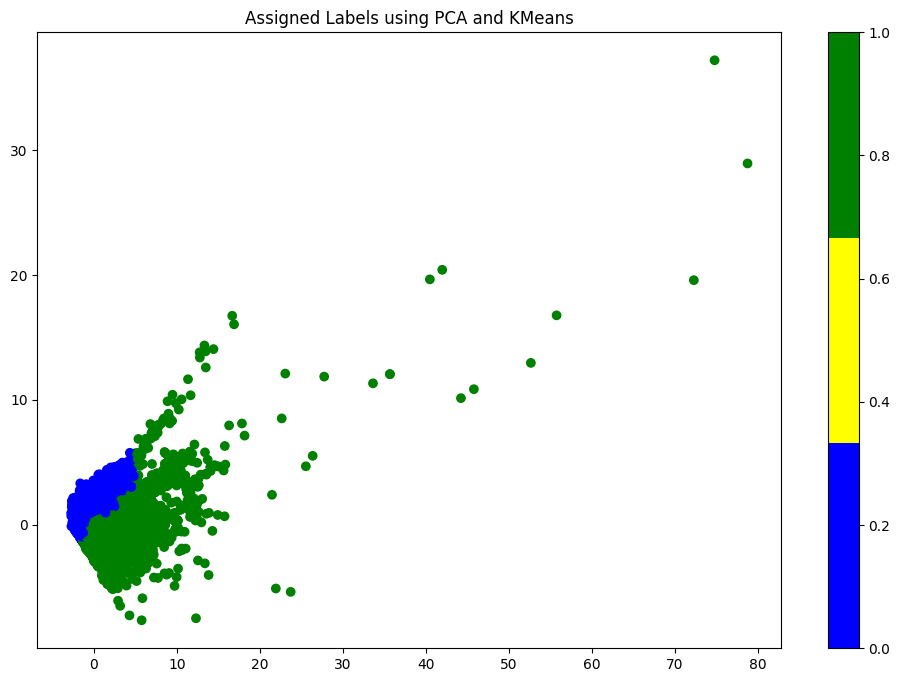

In [ ]:
# Create a new column to assign labels to the clusters

legitimate_clusters = [0, 1, 3]
phishing_clusters = [2, 4, 5, 6, 7, 8, 9]

clustered_df = pd.DataFrame({
    'original_label': balanced_df['label'],
    'cluster_label': kcluster_labels1
})

clustered_df['assigned_label'] = clustered_df['cluster_label'].apply(lambda x: 0 if x in legitimate_clusters else 1 if x in phishing_clusters else 2)

# Create a custom colormap with specific colors for each label
cmap = mcolors.ListedColormap(['blue', 'yellow', 'green'])

# Plot the assigned labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustered_df['assigned_label'], cmap=cmap)
plt.title('Assigned Labels using PCA and KMeans')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Count the number of legitimate and phishing labels in each assigned cluster
assigned_label_counts = clustered_df.groupby('assigned_label')['original_label'].value_counts().unstack(fill_value=0)

print(assigned_label_counts)

original_label  legitimate  phishing
assigned_label                      
0                    45659      1652
1                     4341     48348


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Given values based on the label counts
TP = assigned_label_counts.loc[1, 'phishing']  #phishing correctly identified
TN = assigned_label_counts.loc[0, 'legitimate']  #legitimate correctly identified
FP = assigned_label_counts.loc[1, 'legitimate']  #legitimate identified as phishing
FN = assigned_label_counts.loc[0, 'phishing']  #phishing identified as legitimate

# Create true and predicted arrays based on these values
true_labels = [1] * TP + [1] * FN + [0] * TN + [0] * FP
predicted_labels = [1] * TP + [0] * FN + [0] * TN + [1] * FP

# Calculate metrics using sklearn functions
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.94007
Precision: 0.9176108865228036
Recall: 0.96696
F1 Score: 0.9416393187196291


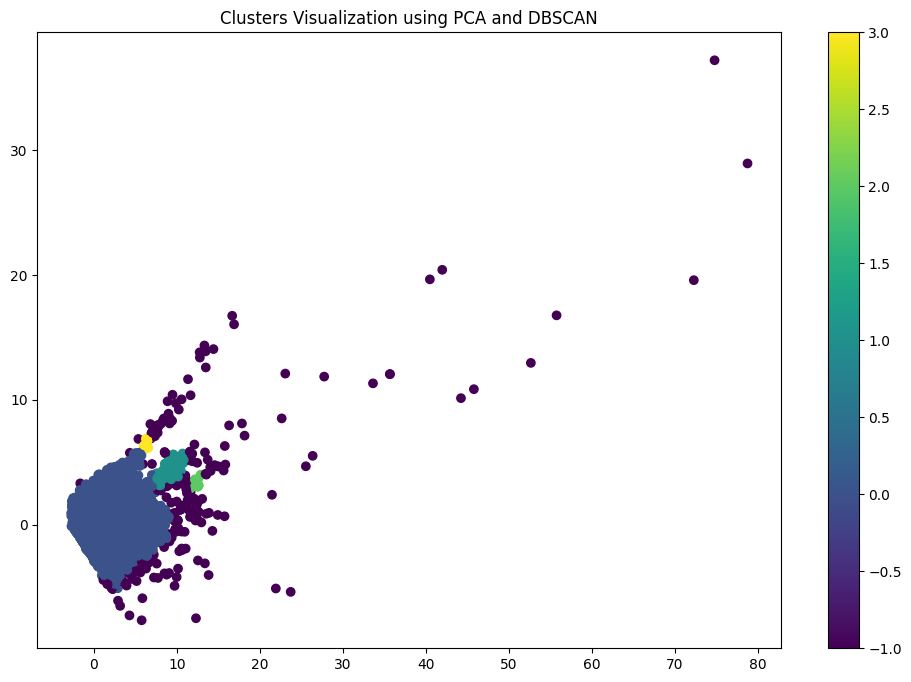

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_pca)

# Plot clusters using DBSCAN
plt.figure(figsize=(12, 8))
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('Clusters Visualization using PCA and DBSCAN')
plt.colorbar(scatter2)
plt.show()

In [ ]:
# Create a DataFrame with the original labels and the DBSCAN cluster labels
dbscan_analysis = pd.DataFrame({
    'original_label': balanced_df['label'],
    'cluster_label': dbscan_labels
})

# Group by cluster label and count the occurrences of each original label
dbscan_label_counts = dbscan_analysis.groupby('cluster_label')['original_label'].value_counts().unstack(fill_value=0)

# Print the counts to see which cluster label corresponds to which original label
print(dbscan_label_counts)

original_label  legitimate  phishing
cluster_label                       
-1                      51       167
 0                   49936     49640
 1                       0       155
 2                       0        38
 3                      13         0


The clustering here using dbscan do not seem to differentiate the target classes, hence we try tuning parameters to get better clusters

eps values: 100%|██████████| 5/5 [53:54<00:00, 646.87s/it]


Best DBSCAN parameters based on Silhouette Score: eps=0.5, min_samples=25
Best DBSCAN parameters based on Davies-Bouldin Index: eps=0.2, min_samples=25


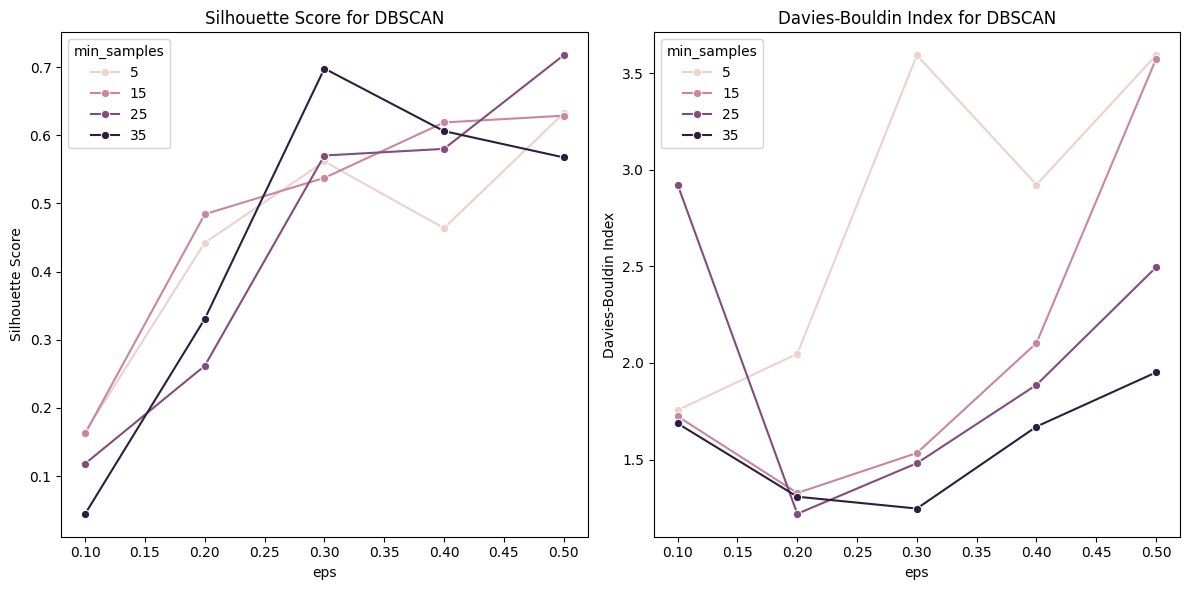

In [ ]:
# Step 1: Compute the k-Nearest Neighbors distance
def compute_knn_distances(X_pca, n_neighbors):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(X_pca)
    distances, _ = knn.kneighbors(X_pca)
    sorted_distances = np.sort(distances[:, n_neighbors - 1])
    return sorted_distances

# Step 2: Plot the k-NN distance plot to find a suitable eps
def plot_knn_distance(X_pca, n_neighbors=10):
    sorted_distances = compute_knn_distances(X_pca, n_neighbors)
    plt.figure(figsize=(12, 8))
    plt.plot(sorted_distances)
    plt.title(f'k-NN Distance Plot (k={n_neighbors})')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'Distance to {n_neighbors}-th nearest neighbor')
    plt.grid(True)
    plt.show()

# Step 3: Automatic selection of eps and min_samples based on Silhouette Score or Davies-Bouldin Index
def dbscan_auto_select(X_pca, eps_values, min_samples_range):
    best_silhouette = -1
    best_db_index = float('inf')
    best_params_silhouette = {}
    best_params_db_index = {}
    results = []

    for eps in tqdm(eps_values, desc="eps values"):
        for min_samples in tqdm(min_samples_range, desc="min_samples values", leave=False):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_pca)

            if len(np.unique(clusters)) > 1:
                silhouette = silhouette_score(X_pca, clusters)
                db_index = davies_bouldin_score(X_pca, clusters)
                results.append((eps, min_samples, silhouette, db_index))

                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params_silhouette = {'eps': eps, 'min_samples': min_samples}

                if db_index < best_db_index:
                    best_db_index = db_index
                    best_params_db_index = {'eps': eps, 'min_samples': min_samples}

    return results, best_params_silhouette, best_params_db_index

# Step 4: Automatically choose the best eps and min_samples values based on performance metrics
eps_values = np.linspace(0.1, 0.5, 5)
min_samples_range = range(5, 40, 10)

# Experiment with different n_neighbors values
n_neighbors_values = [2, 3, 5, 10]

# for n_neighbors in n_neighbors_values:
#     print(f"Plotting k-NN distance plot for n_neighbors={n_neighbors}")
#     plot_knn_distance(X_pca, n_neighbors)

results, best_params_silhouette, best_params_db_index = dbscan_auto_select(X_pca, eps_values, min_samples_range)

# Step 5: Print best DBSCAN configuration and results
print(f"Best DBSCAN parameters based on Silhouette Score: eps={best_params_silhouette['eps']}, min_samples={best_params_silhouette['min_samples']}")
print(f"Best DBSCAN parameters based on Davies-Bouldin Index: eps={best_params_db_index['eps']}, min_samples={best_params_db_index['min_samples']}")

# Step 6: Plot the Silhouette and Davies-Bouldin scores
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'Silhouette Score', 'Davies-Bouldin Index'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x='eps', y='Silhouette Score', hue='min_samples', marker='o')
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x='eps', y='Davies-Bouldin Index', hue='min_samples', marker='o')
plt.title('Davies-Bouldin Index for DBSCAN')
plt.xlabel('eps')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

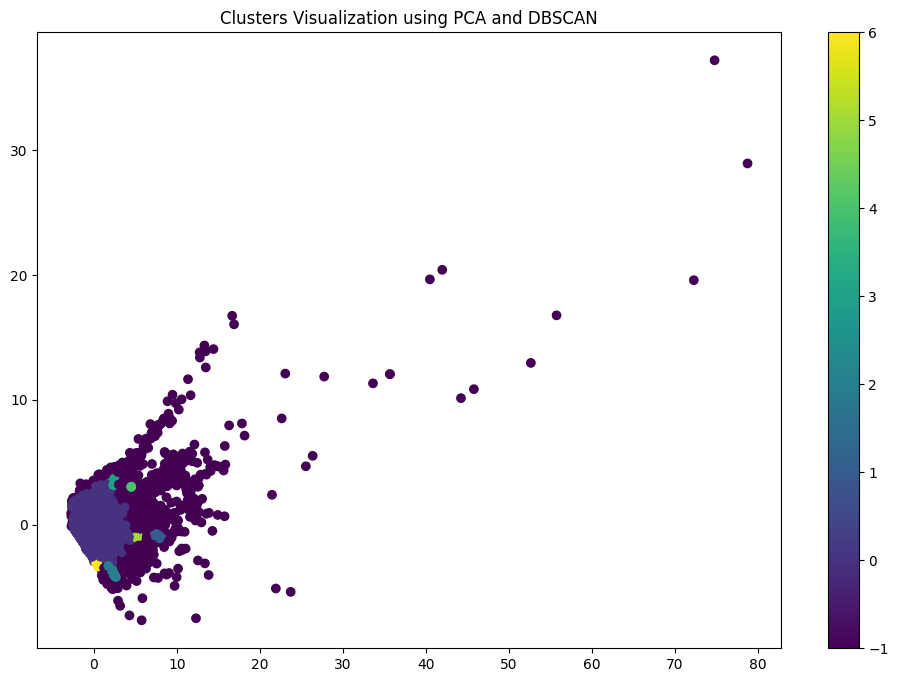

In [ ]:
# Apply DBSCAN clustering
dbscan2 = DBSCAN(eps=0.2, min_samples=25)
dbscan_labels2 = dbscan2.fit_predict(X_pca)

# Plot clusters using DBSCAN
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels2, cmap='viridis')
plt.title('Clusters Visualization using PCA and DBSCAN')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Create a DataFrame with the original labels and the DBSCAN cluster labels
cluster_analysis2 = pd.DataFrame({
    'original_label2': balanced_df['label'],
    'cluster_label2': dbscan_labels2
})

# Group by cluster label and count the occurrences of each original label
cluster_label_counts2 = cluster_analysis2.groupby('cluster_label2')['original_label2'].value_counts().unstack(fill_value=0)

# Print the counts to see which cluster label corresponds to which original label
print(cluster_label_counts2)

original_label2  legitimate  phishing
cluster_label2                       
-1                      356      1390
 0                    49390     48233
 1                        0       191
 2                        0       115
 3                      206         2
 4                       25         0
 5                        0        59
 6                       23        10


Even with the best params, we see our model is not able to differentiate between legitimate and phishing and hence dbscan fails in clustering this dataset.

In [21]:
# Step 1: Perform Agglomerative Clustering
def hierarchical_clustering(X_scaled, num_clusters, linkage_method='ward'):
    hc = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method)
    return hc.fit_predict(X_scaled)

# Step 2: Evaluate the clustering using Silhouette Score and Davies-Bouldin Index
def evaluate_clustering(X_scaled, cluster_labels):
    return silhouette_score(X_scaled, cluster_labels), davies_bouldin_score(X_scaled, cluster_labels)

# Step 3: Run experiments with different numbers of clusters
num_clusters_range = range(2, 12)
sil_scores = []
db_scores = []

for k in tqdm(num_clusters_range, desc="Clustering Progress"):
    cluster_labels = hierarchical_clustering(X_scaled, k)
    sil_score, db_score = evaluate_clustering(X_scaled, cluster_labels)
    sil_scores.append(sil_score)
    db_scores.append(db_score)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, sil_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Step 5: Visualize Dendrogram (for linkage='ward', 'complete', or 'average')
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Step 6: Determine the best parameters
best_silhouette_index = np.argmax(sil_scores)
best_silhouette_clusters = num_clusters_range[best_silhouette_index]
best_silhouette_score = sil_scores[best_silhouette_index]

best_davies_bouldin_index = np.argmin(db_scores)
best_davies_bouldin_clusters = num_clusters_range[best_davies_bouldin_index]
best_davies_bouldin_score = db_scores[best_davies_bouldin_index]

print(f"Best number of clusters based on Silhouette Score: {best_silhouette_clusters} (Score: {best_silhouette_score:.4f})")
print(f"Best number of clusters based on Davies-Bouldin Index: {best_davies_bouldin_clusters} (Score: {best_davies_bouldin_score:.4f})")

Clustering Progress:   0%|          | 0/10 [00:00<?, ?it/s]


MemoryError: Unable to allocate 37.3 GiB for an array with shape (4999950000,) and data type float64

In [ ]:
# Step 1: Sample the dataset to balance and reduce size
target_size = 5000  # Adjust this value based on your memory constraints

legitimate_sample = df[df['label'] == 'legitimate'].sample(n=target_size, random_state=42)
phishing_sample = df[df['label'] == 'phishing'].sample(n=target_size, random_state=42)

# Combining the samples
balanced_df = pd.concat([legitimate_sample, phishing_sample])

# Shuffling
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Perform Agglomerative Clustering
# Replace ['feature1', 'feature2', 'feature3'] with your actual feature columns
X_pca_sampled = balanced_df[['url_length', 'number_of_dots', 'number_of_hyphens']]
hclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
hclust_labels = hclust.fit_predict(X_pca_sampled)

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram (Balanced and Sampled)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [10]:
hclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
hclust_labels = hclust.fit_predict(X_pca)

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

MemoryError: Unable to allocate 37.3 GiB for an array with shape (4999950000,) and data type float64

In [ ]:
# Create a DataFrame with the original labels and the DBSCAN cluster labels
hclust_analysis = pd.DataFrame({
    'original_label': balanced_df['label'],
    'hclust_labels': hclust_labels
})

# Group by cluster label and count the occurrences of each original label
cluster_label_counts2 = cluster_analysis2.groupby('cluster_label2')['original_label2'].value_counts().unstack(fill_value=0)

# Print the counts to see which cluster label corresponds to which original label
print(cluster_label_counts2)